# Linear Regression Example for SimpleAutodiff

## Content 
1. Generate a dataset 
2. Define our model + loss
3. Train our model
4. Visualize the result


In [19]:
%matplotlib inline

We use This so that we can access the file from above file

In [20]:
import sys
sys.path.append("..")

We are going to import all the classes we want to use.

In [21]:
from AutoDiff.scalarCalculation.values import variable, constant
from AutoDiff.scalarCalculation.operators import Arithmetic, sigmoid, square
from AutoDiff.scalarCalculation.visualize import visualize

Import random to add the noise to the generated data. 

In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Generate a dataset

Define the x numpy array

In [23]:
x = np.arange(-5.0, 5.0, 0.1)

Create a linear function, given a number x, return a $3x + 4$

In [24]:
def linearFunction(x):
    return x*3 + 4

Loop through the number between negative ten to ten with 0.1 interval and store it in the list.

In [25]:
y = linearFunction(x) + np.random.randn(100) * 0.5

Draw a data points

[0, 6, 0, 20]

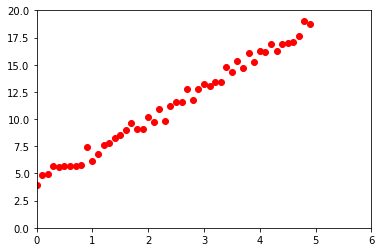

In [26]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

### Define the model + loss

#### The model

Define a slope and y-intersection

In [27]:
w = variable.Variables(random.random(), name="w")
b = variable.Variables(random.random(), name="b")
print(w.value)
print(b.value)

0.5244818128481988
0.8201526310271704


Define the first point's x-axis and y-axis

In [28]:
x_var = constant.Constant(x[0].item())
y_var = constant.Constant(y[0].item(), name="y_var")
num_point_inverse = constant.Constant(1/100)

#### The model loss

In [29]:
prediction = Arithmetic.Add(Arithmetic.Multiply(x_var, w), b)
loss = square.Square(Arithmetic.Minus(y_var , prediction))
print("x_var is", x_var.value)
print("y_var is", y_var.value)
print("The loss is", loss.forward())
print("The prediction is", prediction.forward())

x_var is -5.0
y_var is -11.182146087868443
The loss is 87.98232993349674
The prediction is -1.8022564332138238


#### Define a training loop 

In [30]:
loss.backward(1)
print("w grad is", w.get_grad())
print("b grad is ", b.get_grad())

w grad is -93.79889654654619
b grad is  18.759779309309238


#### Define the list that contains the loss
so that we can see how the loss decreases

In [31]:
loss_array = []

The loop

In [32]:
for a in range(15):
    for i in range(0, 100):
        # We sample the point
        random_num = np.random.randint(0, 100)
        x_var = constant.Constant(x[random_num].item(), name="x_var")
        y_var = constant.Constant(y[random_num].item(), name="y_var")
        
        # Do the prediction
        prediction = Arithmetic.Add(Arithmetic.Multiply(x_var, w), b)
        
        # Calculate the loss
        loss = square.Square(Arithmetic.Minus(y_var , prediction))
        print("The Loss is", loss.forward())
        
        # Every 10 iterations 
        if i % 10 == 0:
            loss_array.append(loss.forward())
            
        if i % 10 == 0:
            loss = square.Square(Arithmetic.Minus(y_var , prediction))
            print("The Loss is", loss.forward())
        loss.backward(1)
        
        # Update the loss
        w.value = w.value - 0.001 * w.get_grad()
        b.value = b.value - 0.001 * b.get_grad()

The Loss is 9.616409532455254
The Loss is 9.616409532455254
The Loss is 21.345355045302586
The Loss is 53.228387764666245
The Loss is 85.98306988905567
The Loss is 8.601947800294715
The Loss is 0.4689892386794281
The Loss is 2.7493683730056246
The Loss is 2.6392388474999335
The Loss is 80.98440343057743
The Loss is 105.75828565563792
The Loss is 34.29146497947019
The Loss is 34.29146497947019
The Loss is 45.71863352023499
The Loss is 133.56443792566765
The Loss is 11.477010438661019
The Loss is 23.60304879480531
The Loss is 38.83863346867876
The Loss is 43.10267128528162
The Loss is 5.139844295398783
The Loss is 6.384207599736593
The Loss is 3.289435733269835
The Loss is 35.5884806165837
The Loss is 35.5884806165837
The Loss is 5.411499826678454
The Loss is 0.009512765412204244
The Loss is 35.16240031053153
The Loss is 2.8885641963668562
The Loss is 0.2149935026994411
The Loss is 11.820038062060991
The Loss is 83.02818887728608
The Loss is 0.0003995662261603489
The Loss is 15.206187489

The Loss is 1.2063760731159499
The Loss is 4.944440281684901
The Loss is 5.897458567667381
The Loss is 3.959290678449713
The Loss is 2.7951290049714443
The Loss is 4.4073781485673
The Loss is 4.4073781485673
The Loss is 1.777550778127048
The Loss is 8.244873750280984
The Loss is 8.362647309198866
The Loss is 4.222335492152853
The Loss is 1.7980844381156038
The Loss is 2.1070578171916394
The Loss is 5.419633893553617
The Loss is 3.5225766905978526
The Loss is 0.8753226860340086
The Loss is 4.599113589510879
The Loss is 4.599113589510879
The Loss is 3.5853414786808355
The Loss is 1.4446607121042505
The Loss is 2.899075743237719
The Loss is 2.558149989774762
The Loss is 2.252505165157594
The Loss is 2.9301549524143526
The Loss is 6.79025928329991
The Loss is 4.110418401809377
The Loss is 2.417491227451626
The Loss is 0.8070493396077885
The Loss is 0.8070493396077885
The Loss is 4.210662626046264
The Loss is 5.2169271823117676
The Loss is 3.040831761105783
The Loss is 3.129424900826758
The

The Loss is 0.2686379246431443
The Loss is 0.26131837095276766
The Loss is 0.013658238838189342
The Loss is 0.48872607796963197
The Loss is 2.2010240610600103e-05
The Loss is 0.1903159956679741
The Loss is 0.07102250401041861
The Loss is 0.059936906153726495
The Loss is 0.059936906153726495
The Loss is 0.4492971393665608
The Loss is 0.00326726668908441
The Loss is 0.17116881704106757
The Loss is 0.0032411808318387222
The Loss is 1.1734708406303314
The Loss is 0.04490847517882797
The Loss is 0.5130894711181647
The Loss is 0.35262527374603064
The Loss is 0.07410770851440597
The Loss is 0.002527400321411686
The Loss is 0.002527400321411686
The Loss is 0.3551878527235023
The Loss is 1.0209028300459668
The Loss is 0.42577494831347273
The Loss is 0.03958385991618908
The Loss is 0.3281985169785067
The Loss is 0.002567977495248125
The Loss is 0.11659692698221855
The Loss is 1.165946381000394
The Loss is 0.39042323467017526
The Loss is 0.03305867719933015
The Loss is 0.03305867719933015
The Los

The Loss is 1.0999695245828292
The Loss is 1.446604665702698
The Loss is 0.02242379827533799
The Loss is 0.003156653247167666
The Loss is 0.02977398769402858
The Loss is 0.003876857850646775
The Loss is 0.003876857850646775
The Loss is 0.3290472706755254
The Loss is 0.3388425159045043
The Loss is 0.04721330075028756
The Loss is 0.13851828989114565
The Loss is 0.03502428878936801
The Loss is 0.02809336878590187
The Loss is 0.25243489128801166
The Loss is 0.00957255367536738
The Loss is 0.08316549332534477
The Loss is 0.0046351352779867095
The Loss is 0.0046351352779867095
The Loss is 0.09068272837266303
The Loss is 0.4377174509705608
The Loss is 0.055695272143887524
The Loss is 0.02987259135096204
The Loss is 0.8689558139317242
The Loss is 0.1087848300316405
The Loss is 0.20395014653189436
The Loss is 0.00537243672962201
The Loss is 0.9217038576331292
The Loss is 0.018101026845902896
The Loss is 0.018101026845902896
The Loss is 0.9512375326428116
The Loss is 1.415283351623438
The Loss i

## Visualize the result

#### Plot the loss.

Text(0,0.5,'Loss')

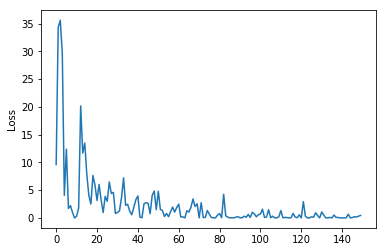

In [33]:
plt.plot(loss_array)
plt.ylabel('Loss')

#### Plot the result

As you can see the w value and b value is similar to the defined model

In [34]:
print("w value is", w.value)
print("b value is", b.value)

w value is 2.9923399248805116
b value is 3.819518492283736


Let's see how the w value and b value graph turn out!!!

[0, 6, 0, 20]

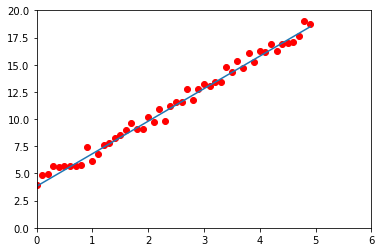

In [35]:
plt.plot(x, y, 'ro')
plt.plot(x, x*w.value + b.value)
plt.axis([0, 6, 0, 20])

We made it using simpleAutoDiff

Looking at the computational graph

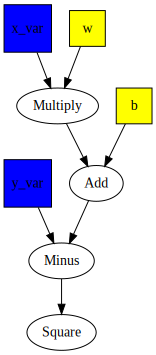

In [36]:
visualize.plot_graph(loss, mode="d")

And we are done !!!